In [295]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import math
import cv2
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import re

sys.path.append(os.getcwd()+'\\..\\scripts\\')
# plt.rcParams['figure.figsize'] = [25, 15]

# from MNGFeaturesRegions import MNGFeaturesRegions
# from MNGFeaturesMeans import MNGFeaturesMeans
# from MNGFeaturesGradient import MNGFeaturesGradient
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = pd.read_csv(os.getcwd()+'\\..\\results\\dados_reais_predict.csv', sep=';', index_col=0)

In [4]:
y_real = data['time_real'].apply(lambda x: 1 if x >=160 else 0)
y_scores = data['time_predict'].apply(lambda x: 1 if x>=160 else 0)

In [5]:
confusion_matrix(y_real, y_scores)

array([[531,   9],
       [ 51,  69]], dtype=int64)

In [6]:
roc_auc_score(y_real, y_scores)

0.7791666666666666

In [8]:
fpr, tpr, thresholds = roc_curve(y_real, y_scores)

In [10]:
fpr

array([0.        , 0.01666667, 1.        ])

In [11]:
tpr

array([0.   , 0.575, 1.   ])

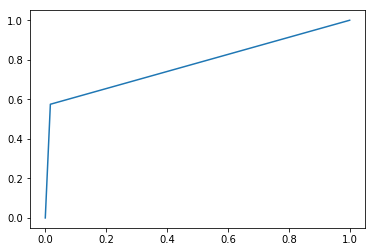

In [9]:
plt.plot(fpr, tpr)

In [215]:
r2 = pd.read_csv('../results_r2.csv', index_col=0)
rmse = pd.read_csv('../results_rmse.csv', index_col=0)

In [216]:
r2

,MLR,RF
Variables,,
A1 (means),0.835541,0.937897
A2 (dominant HSV),0.008910,0.098828
A3 (equator stalk apex),0.873322,0.951455
A4 (área),0.206009,0.476221
A5 (RGB),0.803817,0.921489
A6 (Lab fractais),0.889803,0.963026
A7 (HSV),0.513974,0.893807
A8 (HSV Lab),0.839790,0.926696
A9 (RGB HSV rates),0.844819,0.941139


In [217]:
r2.index.values.tolist()

['A1 (means)',
 'A2 (dominant HSV)',
 'A3 (equator stalk apex)',
 'A4 (área)',
 'A5 (RGB)',
 'A6 (Lab fractais)',
 'A7 (HSV)',
 'A8 (HSV Lab)',
 'A9 (RGB HSV rates)',
 'A10 (*b área diâmetro)',
 'Todas']

In [218]:
inds = r2.index.values[:-1]

In [219]:
new_indexes = [re.search('(.*)[(].*[)]', ind).group(1).strip() for ind in inds]

In [220]:
new_indexes.append(r2.index.values[-1])

In [221]:
new_indexes

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Todas']

In [222]:
r2.reset_index(inplace=True)
r2.index = new_indexes
r2

,Variables,MLR,RF
A1,A1 (means),0.835541,0.937897
A2,A2 (dominant HSV),0.008910,0.098828
A3,A3 (equator stalk apex),0.873322,0.951455
A4,A4 (área),0.206009,0.476221
A5,A5 (RGB),0.803817,0.921489
A6,A6 (Lab fractais),0.889803,0.963026
A7,A7 (HSV),0.513974,0.893807
A8,A8 (HSV Lab),0.839790,0.926696
A9,A9 (RGB HSV rates),0.844819,0.941139
A10,A10 (*b área diâmetro),0.334175,0.604146


In [200]:
plt.rcParams.update({'font.size': 28})

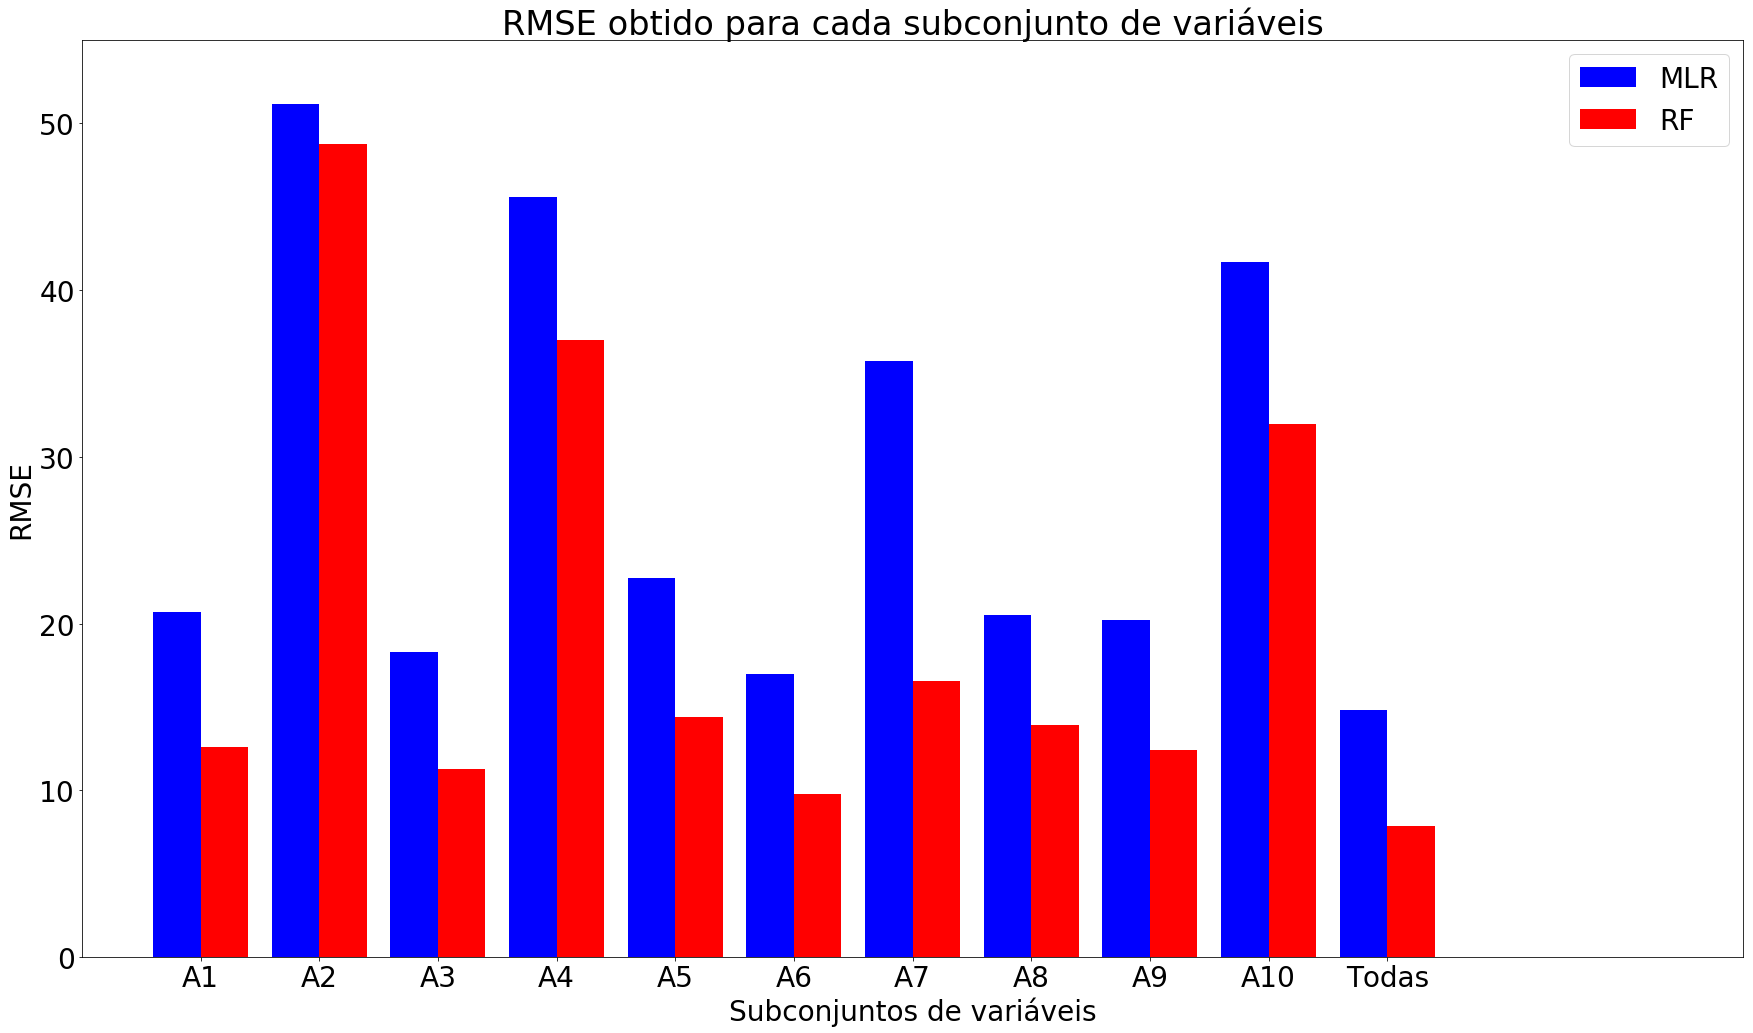

In [224]:
fig, ax = plt.subplots()

r = plt.bar(np.arange(11)-0.2, rmse['MLR'], width=0.4, color='b', label='MLR')
r1 = plt.bar(np.arange(11)+0.2, rmse['RF'], width=0.4, color='r', label='RF')

plt.xticks(np.arange(11), r2.index.values.tolist())
plt.title('RMSE obtido para cada subconjunto de variáveis')
plt.ylabel('RMSE')
plt.xlabel('Subconjuntos de variáveis')
plt.ylim([0, 55])
plt.xlim([-1, 13])

plt.legend()
plt.tight_layout()
plt.savefig('teste.png')

In [227]:
pred = pd.read_csv('../predictions/dados_predict_reais(all-novo_repetição).csv', index_col=0, sep=';')

In [229]:
pred.columns

Index(['sst_predict', 'firmeza_predict', 'time_predict', 'massa_predict',
       'ratio_predict', 'acidez_predict', 'sst_real', 'firmeza_real',
       'time_real', 'acidez_real', 'massa_real', 'ratio_real'],
      dtype='object')

In [286]:
att = 'ratio'
upper = 'Ratio'

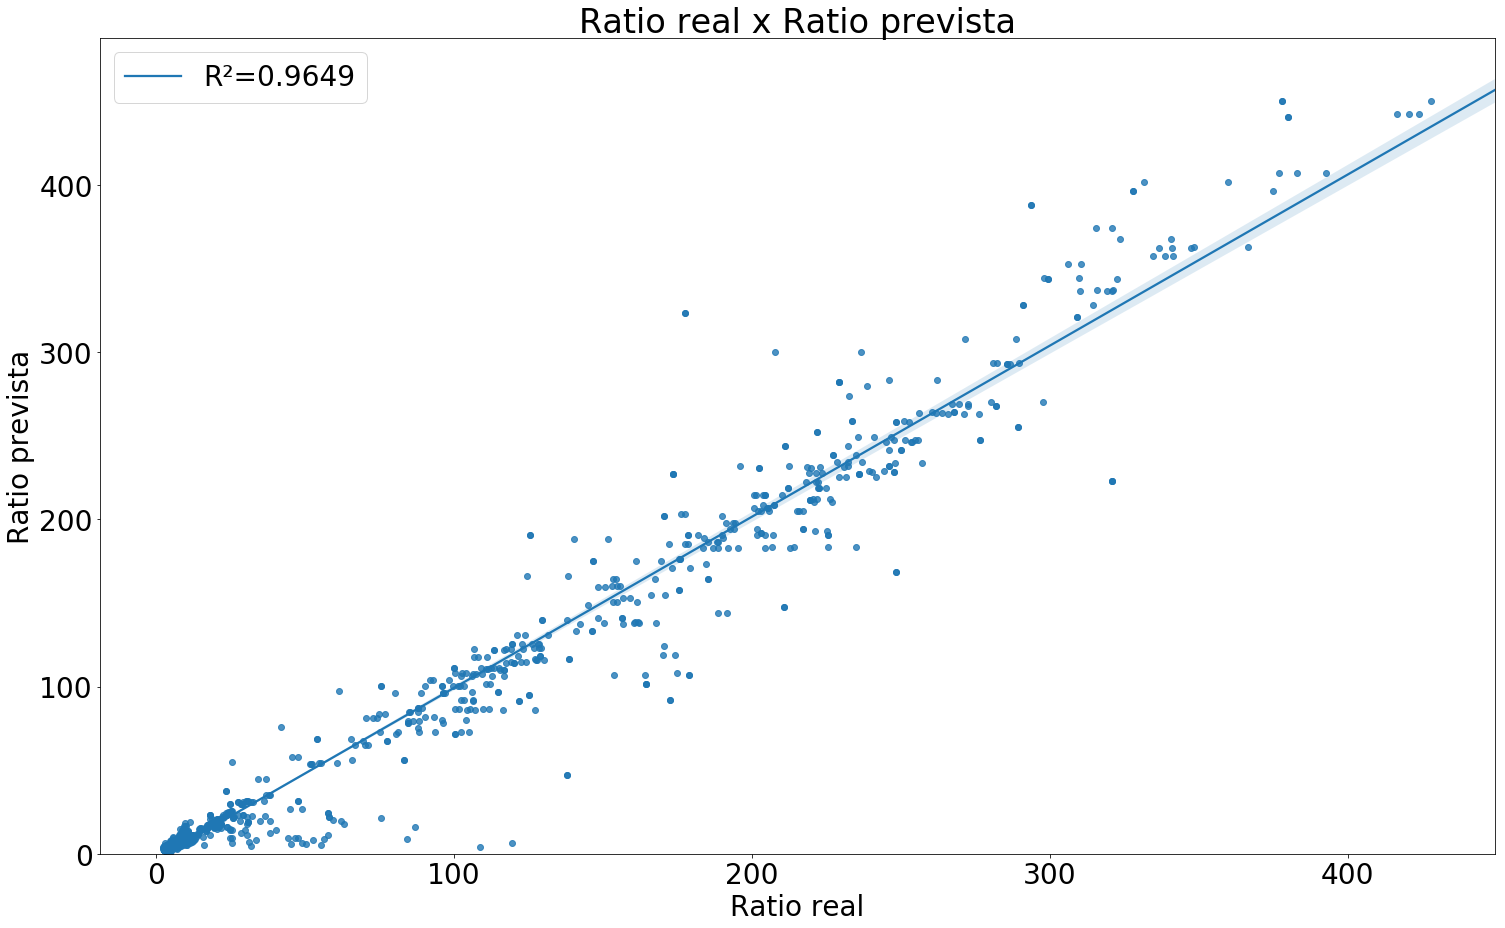

In [287]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pred[att+'_predict'], pred[att+'_real'])
ax = sns.regplot(pred[att+'_predict'], pred[att+'_real'], line_kws={'label':"R²={0:.4f}".format(r_value**2)})
ax.legend()
ax.set(xlabel=upper+' real', ylabel=upper+' prevista', title=upper+' real x '+upper+' prevista', ylim=(0,None))
ax.get_figure().savefig('scatter_'+att+'.png')

In [288]:
data_path = os.getcwd()+'/../resampling/all_data_repeated.csv'
# data_path = os.getcwd()+'/../resampling/all_data_synthetic.csv'
old_data = pd.read_csv(data_path, sep=',', index_col=0)

In [289]:
to_be_deleted = [234, 385, 248, 110, 378, 159, 131, 252, 9, 53, 46, 153, 307, 203, 414, 412, 438, 20, 208, 188, \
                 357, 315, 246, 219, 235, 456, 261, 51, 339, 415, 67, 373, 52, 335, 201, 95, 129, 200, 364, 81, \
                 172, 291, 64, 367, 71, 255, 263, 40, 268, 165, 313, 316, 416, 404, 167, 238, 475, 32, 202, 345, \
                 294, 139, 324, 83, 15, 86, 254, 419, 477, 447, 207, 94, 318, 329, 249, 250, 85, 186, 361, 170, \
                 270, 100, 421, 258, 96, 69, 397, 451, 22, 181, 17, 59, 467, 215, 128, 230, 93, 286, 461, 337, \
                 468, 18, 271, 214, 391, 383, 82, 325, 228, 442, 274, 231, 122, 426, 401, 141, 143, 244, 192, 77]

In [290]:
# ATTENTION! I'M ASSIGNING IT MANUALLY, NOT BASED IN INDEX
resampled_data = old_data.iloc[-480:]
rows_to_delete = resampled_data.iloc[to_be_deleted]

data = old_data.drop(rows_to_delete.index.values)

# remove atributos diff
data = data.drop(columns=data.columns.values[:1710])

In [291]:
n_var_names = list(filter(lambda x: 'region' in x, data.columns.values))
data = data.drop(columns=n_var_names)

In [293]:
data.drop(columns=['height', 'width'], inplace=True)

In [444]:
att = 'time'

In [449]:
data.drop(columns=['time_predict'], inplace=True)

In [450]:
rf_model = RandomForestRegressor(n_estimators=100).fit(data.drop(columns=['sst','firmeza', 'acidez', 'ratio', \
                                                                          'massa', 'time']), data[att])

In [451]:
variables = pd.DataFrame(columns=['variable', 'importance'])
cols = list(filter(lambda x: x not in ['sst','massa','firmeza','time','ratio','acidez'], data.columns.values))
variables['variable'] = cols

variables['importance'] = rf_model.feature_importances_.tolist()
dt = variables[variables['importance'].apply(lambda x: x > 0.02)]

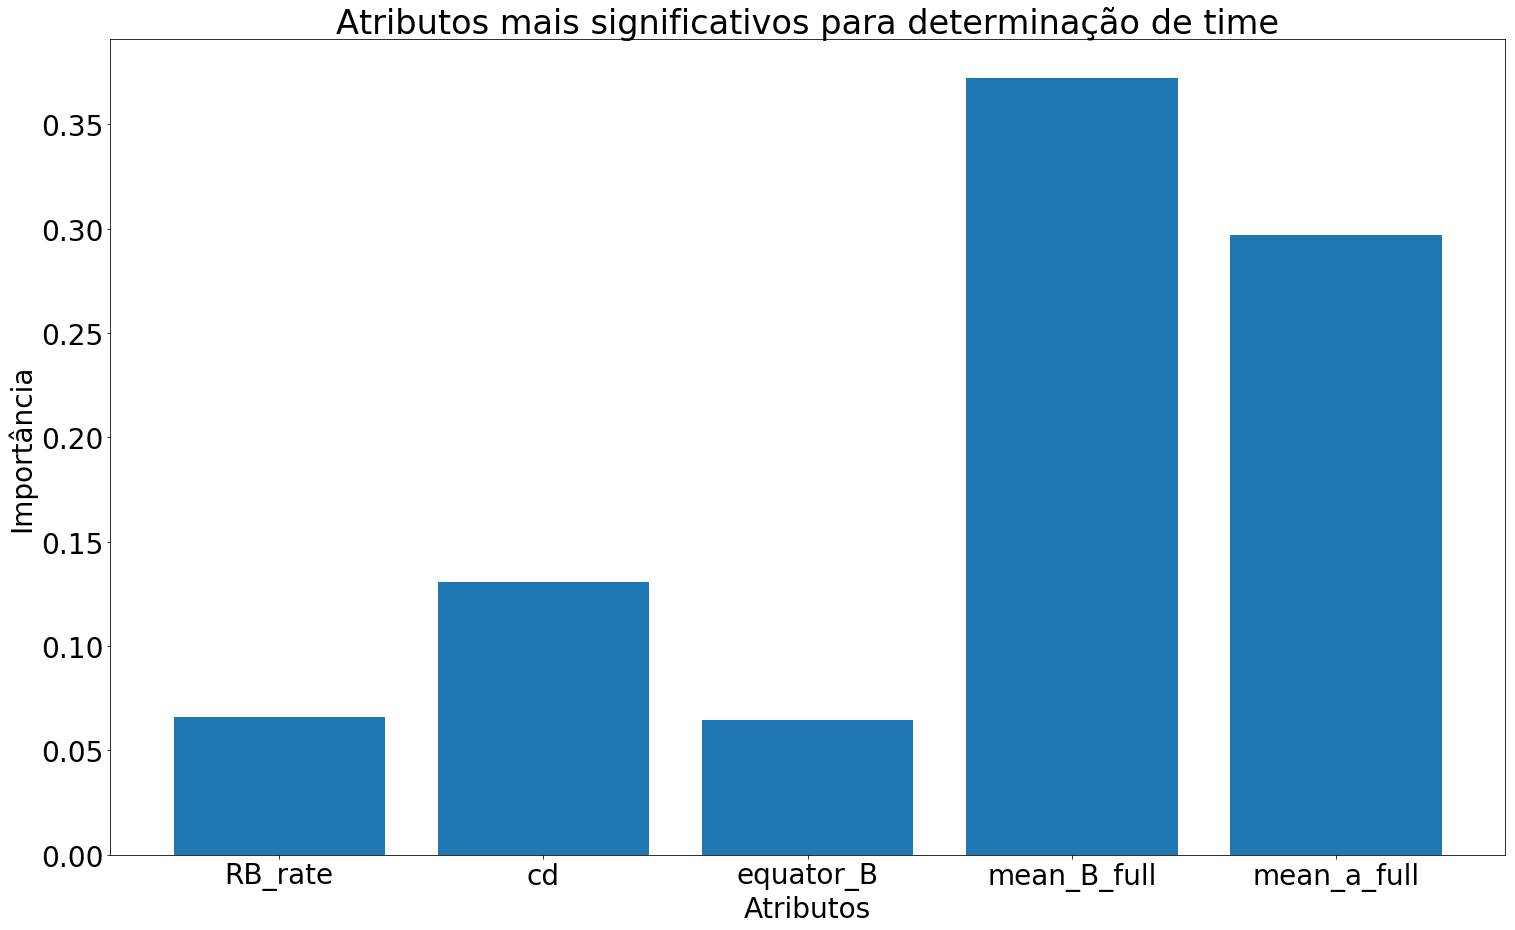

In [452]:
plt.bar(np.arange(dt.shape[0]), dt['importance'])
plt.xticks(np.arange(dt.shape[0]), dt['variable'].astype('str'))
plt.title('Atributos mais significativos para determinação de ' + att)
plt.xlabel('Atributos')
plt.ylabel('Importância')
plt.savefig('importancia_'+att+'.png')

In [420]:
firm = pred.groupby('time_real')['firmeza_real']
firm2 = pred.groupby('time_predict')['firmeza_predict']

Text(0, 0.5, 'Firmeza')

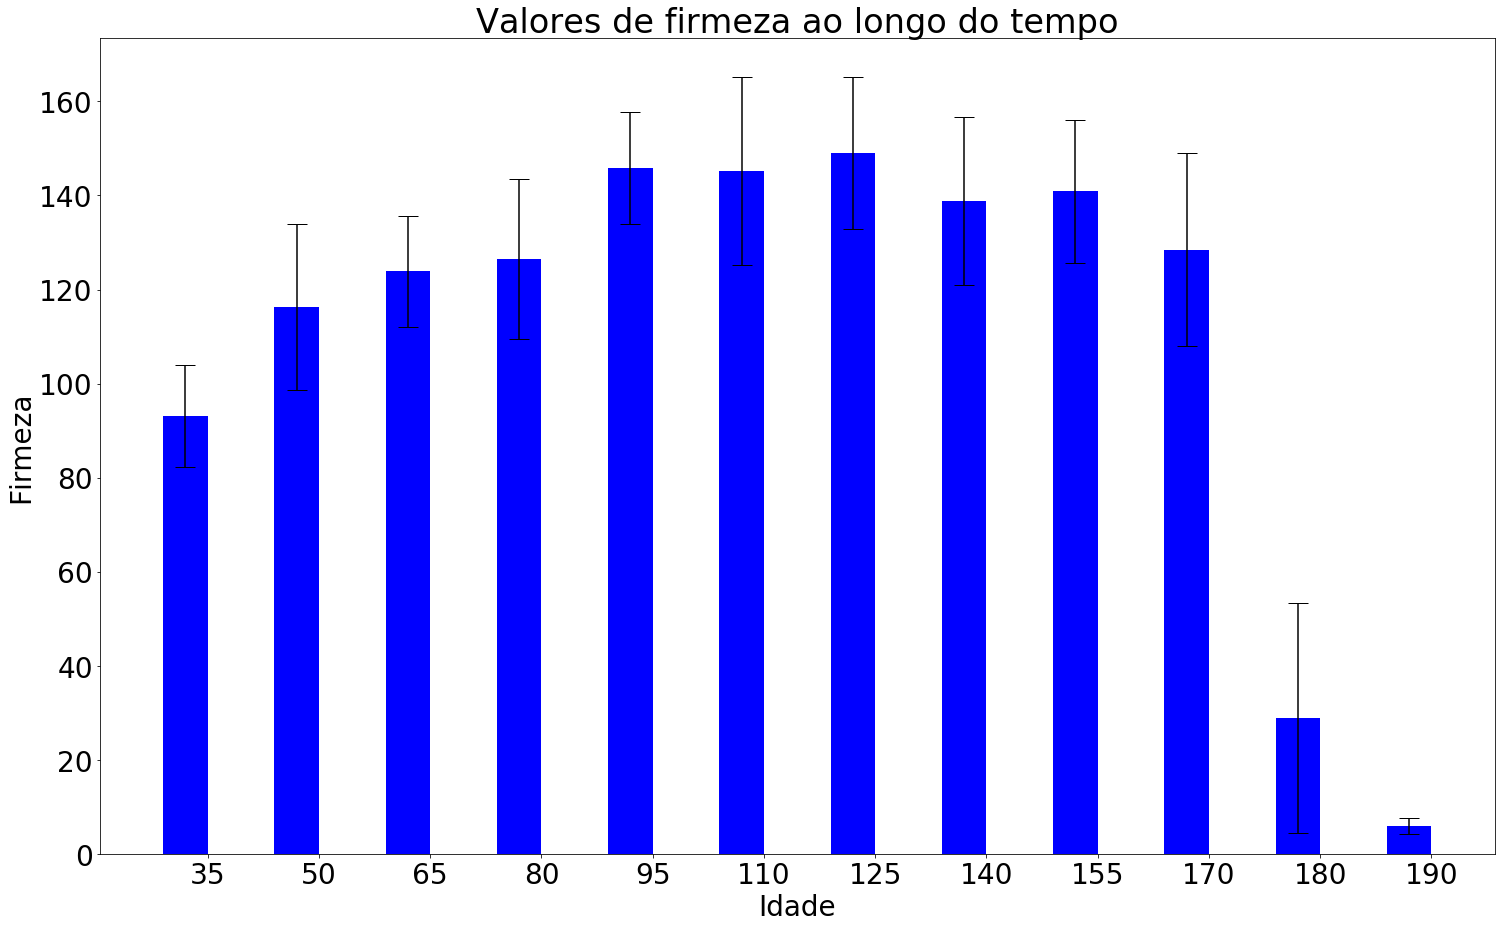

In [424]:
fig, ax = plt.subplots()

a = plt.bar(np.arange(len(pred['time_real'].unique()))-0.2, firm.mean(), yerr=firm.std(), capsize=10, color='b', width=0.4)
# b = plt.bar(np.arange(len(pred['time_real'].unique()))+0.2, firm2.mean(), yerr=firm2.std(), capsize=10, color='r', width=0.4)
plt.xticks(np.arange(len(pred['time_real'].unique())), pred['time_real'].unique().astype('int'))
plt.title('Valores de firmeza ao longo do tempo')
plt.xlabel('Idade')
plt.ylabel('Firmeza')

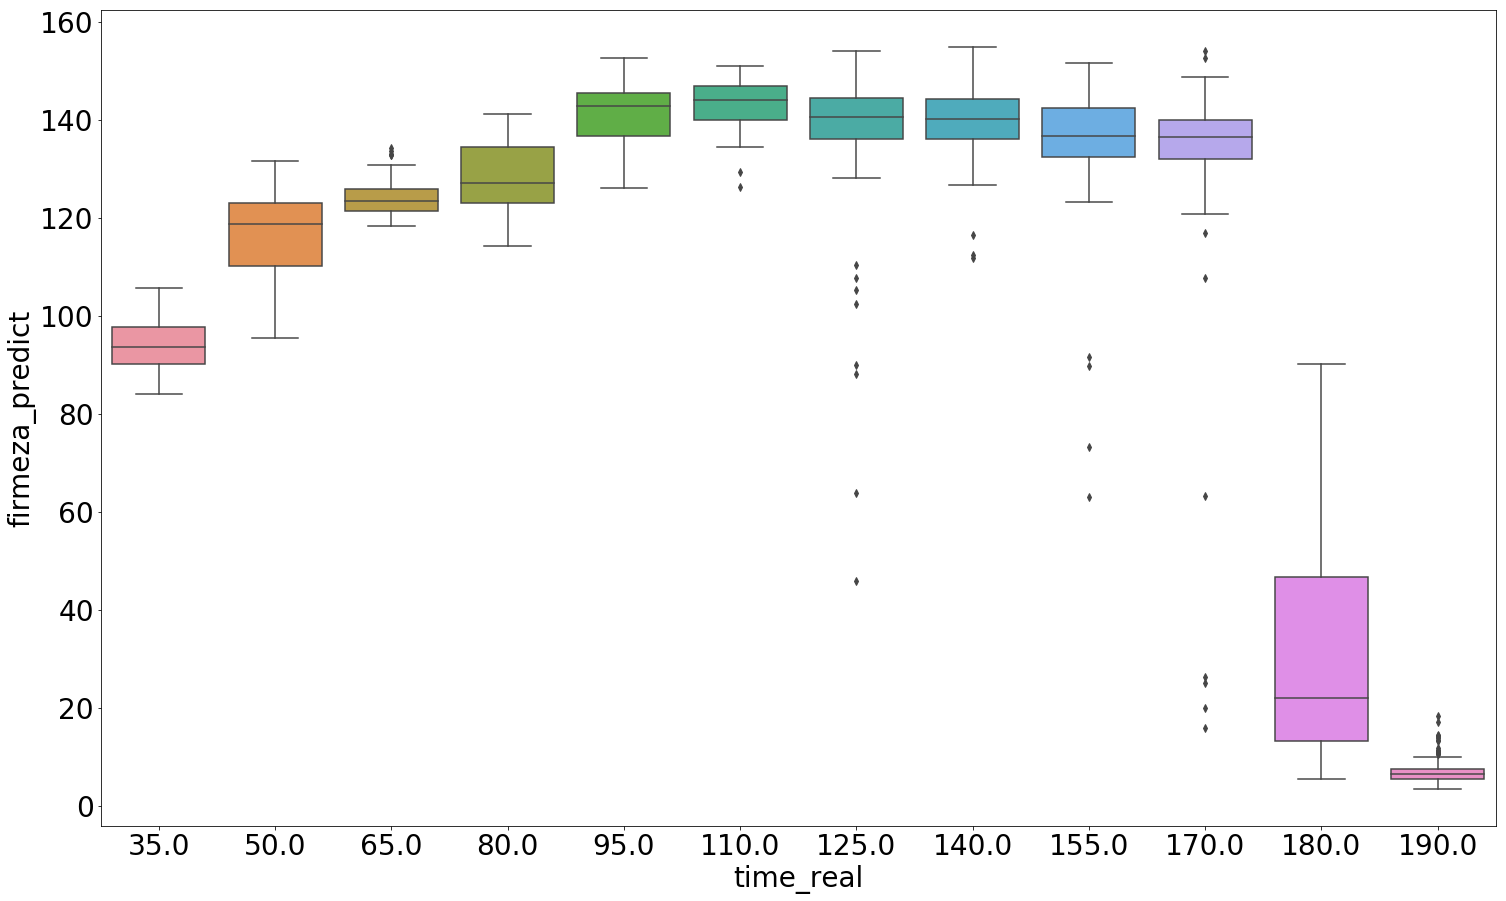

In [407]:
sns.boxplot(x='time_real', y='firmeza_predict', data=pred)

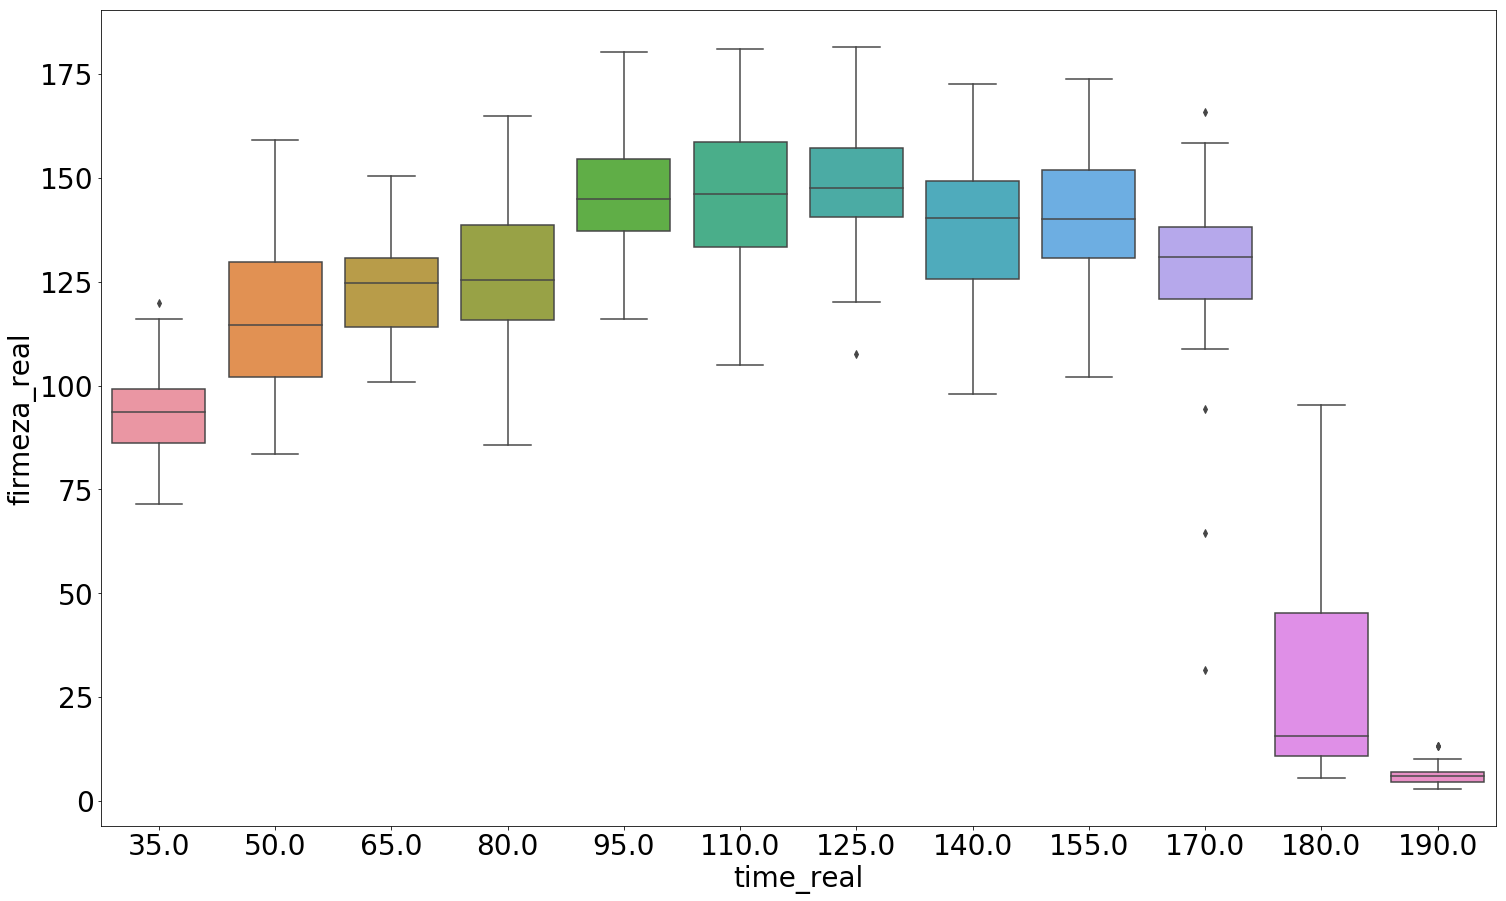

In [406]:
sns.boxplot(x='time_real', y='firmeza_real', data=pred)

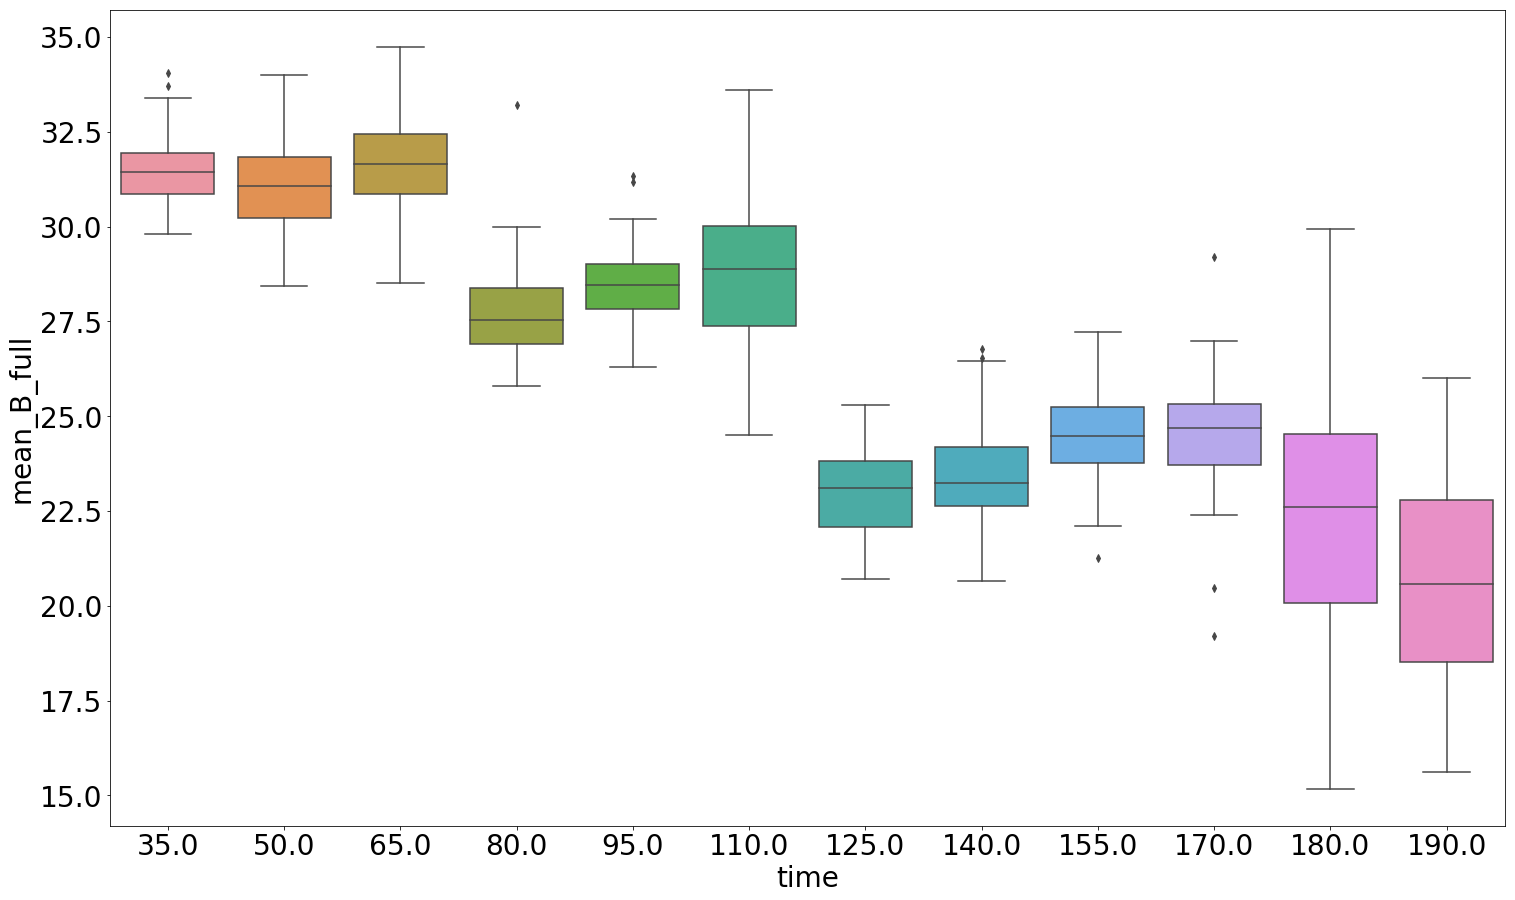

In [426]:
sns.boxplot(x='time', y='mean_B_full', data=data)

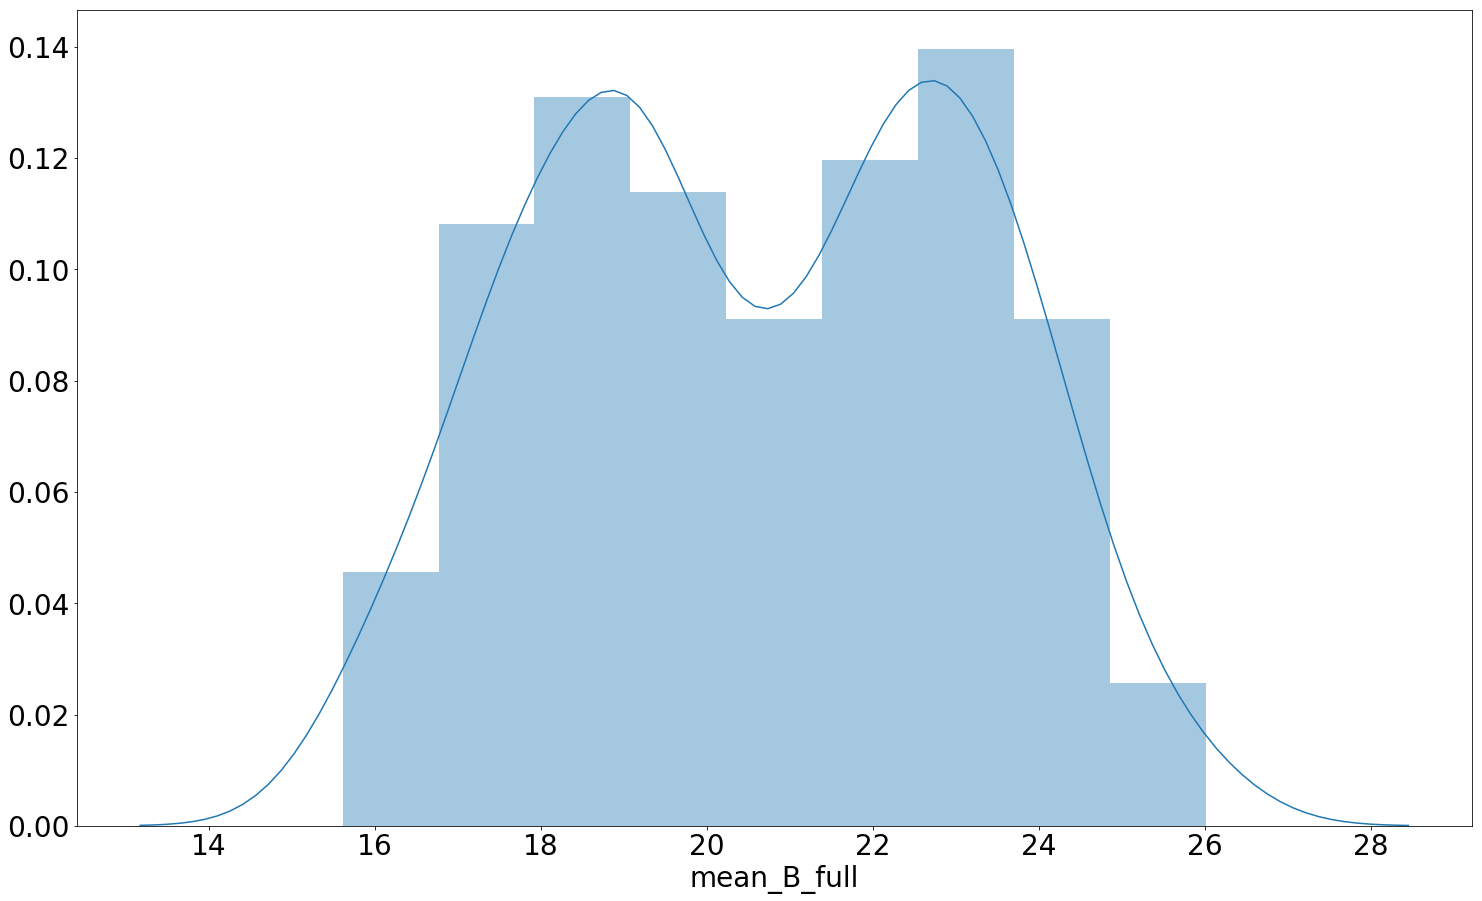

In [432]:
sns.distplot(data[data['time'] == 190]['mean_B_full'])
# sns.distplot(data[data['time'] >= 180]['mean_B_full'])